<a href="https://colab.research.google.com/github/202311003/idm_assignment_1/blob/202311062/DM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm


##Fetching dataset from drive

```
# This is formatted as code
```



In [3]:
df=pd.read_csv('/content/drive/MyDrive/dataminning/project 1/archive (8)/the weather of 187 countries in 2020.csv')

<ipython-input-3-e80764f0a2cd>:1: DtypeWarning: Columns (16,17,18,19,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/dataminning/project 1/archive (8)/the weather of 187 countries in 2020.csv')


##EDA

In [4]:
df.head()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392570,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
1392571,False,False,False,False,False,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
1392572,False,False,False,False,False,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
1392573,False,False,False,False,False,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True


In [7]:
unique_counts = df.nunique()
unique_counts

STATION            6911
Country/Region      187
DATE                188
Year                  1
Month                 7
Day                  31
PRCP               1353
SNWD                779
TAVG               1771
TMAX               1075
TMIN               1001
SNOW                242
LATITUDE           1219
LONGITUDE          1473
ELEVATION           992
PRCP_ATTRIBUTES       3
TAVG_ATTRIBUTES       1
TMAX_ATTRIBUTES       3
TMIN_ATTRIBUTES       3
DAPR                 46
MDPR                 48
WESD                  2
SNWD_ATTRIBUTES       4
dtype: int64

In [8]:
df.shape

(1392575, 23)

In [9]:
df.columns

Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'SNOW', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
       'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'],
      dtype='object')

In [10]:
df.describe()

,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,WESD
count,1392575.0,1.392575e+06,1.392575e+06,1.043369e+06,377429.000000,878632.000000,866705.000000,898381.000000,105392.000000,104742.000000,104742.000000,104742.000000,1293.000000,81.000000,2.000000
mean,2020.0,4.279517e+00,1.595168e+01,2.564688e+00,120.712848,14.814992,17.412551,7.093554,3.742760,37.689351,71.371220,787.542437,5.292343,0.958025,0.050000
std,0.0,1.812637e+00,8.770296e+00,8.035237e+00,293.874318,13.063075,12.707588,12.227766,19.093372,11.572761,71.760255,1094.757321,7.121322,1.653137,0.070711
min,2020.0,1.000000e+00,1.000000e+00,0.000000e+00,-20.000000,-56.200000,-55.000000,-65.000000,0.000000,-17.817000,-140.850000,0.600000,1.000000,0.000000,0.000000
25%,2020.0,3.000000e+00,8.000000e+00,0.000000e+00,0.000000,6.700000,8.400000,0.000000,0.000000,30.667000,75.983000,68.000000,2.000000,0.000000,0.025000
50%,2020.0,4.000000e+00,1.600000e+01,0.000000e+00,0.000000,16.800000,18.500000,7.700000,0.000000,37.850000,104.500000,250.000000,3.000000,0.280000,0.050000
75%,2020.0,6.000000e+00,2.400000e+01,1.500000e+00,99.000000,25.600000,27.222222,15.600000,0.000000,45.217000,116.117000,1099.000000,5.000000,1.510000,0.075000
max,2020.0,7.000000e+00,3.100000e+01,4.849000e+02,52900.000000,43.300000,51.200000,36.700000,625.000000,82.500000,131.983000,4701.000000,61.000000,9.240000,0.100000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392575 entries, 0 to 1392574
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STATION          1392575 non-null  object 
 1   Country/Region   1392575 non-null  object 
 2   DATE             1392575 non-null  object 
 3   Year             1392575 non-null  int64  
 4   Month            1392575 non-null  int64  
 5   Day              1392575 non-null  int64  
 6   PRCP             1043369 non-null  float64
 7   SNWD             377429 non-null   float64
 8   TAVG             878632 non-null   float64
 9   TMAX             866705 non-null   float64
 10  TMIN             898381 non-null   float64
 11  SNOW             105392 non-null   float64
 12  LATITUDE         104742 non-null   float64
 13  LONGITUDE        104742 non-null   float64
 14  ELEVATION        104742 non-null   float64
 15  PRCP_ATTRIBUTES  6007 non-null     object 
 16  TAVG_ATTRIBUTES  3

Checking number of null values in dataset featurewise

In [12]:
df.isnull().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                349206
SNWD               1015146
TAVG                513943
TMAX                525870
TMIN                494194
SNOW               1287183
LATITUDE           1287833
LONGITUDE          1287833
ELEVATION          1287833
PRCP_ATTRIBUTES    1386568
TAVG_ATTRIBUTES    1388725
TMAX_ATTRIBUTES    1386938
TMIN_ATTRIBUTES    1386701
DAPR               1391282
MDPR               1392494
WESD               1392573
SNWD_ATTRIBUTES    1392221
dtype: int64

Droping columns.It can be observed so many columns are dropped reason for it is as seen above many column has more than half of its value missing or ull and if we try to fill this value it will affect our prediction models.

In [13]:
df1 = df.drop(['ELEVATION', 'PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES','DAPR','MDPR','WESD','SNWD_ATTRIBUTES','Year','SNOW','LATITUDE','LONGITUDE','SNWD'], axis=1)

In [14]:
df1.columns

Index(['STATION', 'Country/Region', 'DATE', 'Month', 'Day', 'PRCP', 'TAVG',
       'TMAX', 'TMIN'],
      dtype='object')

In [15]:
df1.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP              349206
TAVG              513943
TMAX              525870
TMIN              494194
dtype: int64

In [16]:
import matplotlib.pyplot as plt


There is need to fill the missing values which are left after performing drop of columns.For that purpose we have first grouped our dataset,the features used for grouping are Country/Region,station and month.After grouping we have calculated median of the group formed for TAVG,TMIN,TMAX,TMIN.Here we have just calculated median and have not filled any missing value yet.Then we have converted this median to a dictionary.

In [17]:
dfnew = df1.copy()
average_temp = dfnew.groupby(['Country/Region','STATION','Month'])['TAVG'].median().to_dict()
average_temp_min = dfnew.groupby(['Country/Region','STATION','Month'])['TMIN'].median().to_dict()
average_temp_max = dfnew.groupby(['Country/Region','STATION','Month'])['TMAX'].median().to_dict()
average_prcp = dfnew.groupby(['Country/Region','STATION','Month'])['PRCP'].median().to_dict()
print(len(average_temp_min))
print(len(average_temp_max))
print(len(average_temp))
print(len(average_prcp))

53299
53299
53299
53299


In [18]:
dfnew.shape

(1392575, 9)

We have plotted heatmap to observe the correlation between attributes and it can be observed tha day and month are the least correlated attributes.

<ipython-input-19-219072a17b51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfnew.corr())


<Axes: >

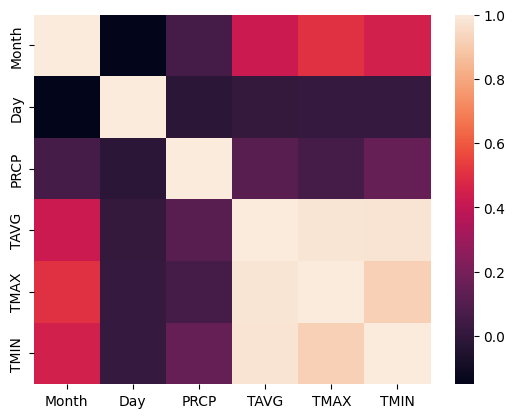

In [19]:

sns.heatmap(dfnew.corr())

In next cell we have filled the missing value

In [20]:
def fill_missing(row,temp_type):
    key = (row['Country/Region'],row['STATION'], row['Month'])
    if(temp_type == 'TAVG'):
      return average_temp.get(key, row[temp_type])
    elif(temp_type == 'TMIN'):
      return average_temp_min.get(key, row[temp_type])
    elif(temp_type == 'PRCP'):
      return average_prcp.get(key, row[temp_type])
    else:
      return average_temp_max.get(key, row[temp_type])


dfnew['TAVG'] = dfnew.apply(fill_missing, args=['TAVG'] ,axis = 1)
dfnew['TMIN'] = dfnew.apply(fill_missing, args=['TMIN'] ,axis = 1)
dfnew['TMAX'] = dfnew.apply(fill_missing, args=['TMAX'] ,axis = 1)
dfnew['PRCP'] = dfnew.apply(fill_missing, args=['PRCP'] ,axis = 1)
dfnew.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP              188290
TAVG              510753
TMAX              386113
TMIN              328369
dtype: int64

In [21]:

df_final=df1.dropna()

In [22]:

df_final.isnull().sum()

STATION           0
Country/Region    0
DATE              0
Month             0
Day               0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
dtype: int64

In [23]:
df_final.shape

(402632, 9)

As we have various countries present in the Country/Region feature and we have to predict it sowe are labellig it using label encoder.It gives unique id to each unique occurence and replaces string label to numerical labes.

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final['Country/Region'] = label_encoder.fit_transform(df_final['Country/Region'])

print(df_final)

             STATION  Country/Region        DATE  Month  Day  PRCP  TAVG  \
0        TZ000063894              35  2020-01-22      1   22  10.9  27.6   
2        TZ000063894              35  2020-01-24      1   24   9.4  27.9   
3        TZ000063894              35  2020-01-25      1   25   0.3  27.9   
7        TZ000063894              35  2020-01-29      1   29   5.1  28.6   
27       TZ000063894              35  2020-02-18      2   18   0.3  29.4   
...              ...             ...         ...    ...  ...   ...   ...   
1392257  COM00080009              34  2020-03-19      3   19   0.0  29.8   
1392258  COM00080009              34  2020-03-20      3   20   0.0  29.8   
1392261  COM00080009              34  2020-03-23      3   23   0.0  29.5   
1392424  COM00080091              34  2020-02-27      2   27   0.5  28.7   
1392427  COM00080091              34  2020-03-01      3    1   0.0  31.8   

         TMAX  TMIN  
0        30.2  24.9  
2        30.6  25.6  
3        30.2  16.3  

<ipython-input-24-21fd96c83560>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Country/Region'] = label_encoder.fit_transform(df_final['Country/Region'])


In [25]:

df_final.head()

,STATION,Country/Region,DATE,Month,Day,PRCP,TAVG,TMAX,TMIN
0,TZ000063894,35,2020-01-22,1,22,10.9,27.6,30.2,24.9
2,TZ000063894,35,2020-01-24,1,24,9.4,27.9,30.6,25.6
3,TZ000063894,35,2020-01-25,1,25,0.3,27.9,30.2,16.3
7,TZ000063894,35,2020-01-29,1,29,5.1,28.6,32.5,26.0
27,TZ000063894,35,2020-02-18,2,18,0.3,29.4,34.0,25.7


In next cell we are labellinf Station using label encoder.

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final['STATION'] = label_encoder.fit_transform(df_final['STATION'])

print(df_final)

         STATION  Country/Region        DATE  Month  Day  PRCP  TAVG  TMAX  \
0           3078              35  2020-01-22      1   22  10.9  27.6  30.2   
2           3078              35  2020-01-24      1   24   9.4  27.9  30.6   
3           3078              35  2020-01-25      1   25   0.3  27.9  30.2   
7           3078              35  2020-01-29      1   29   5.1  28.6  32.5   
27          3078              35  2020-02-18      2   18   0.3  29.4  34.0   
...          ...             ...         ...    ...  ...   ...   ...   ...   
1392257     1274              34  2020-03-19      3   19   0.0  29.8  35.9   
1392258     1274              34  2020-03-20      3   20   0.0  29.8  35.7   
1392261     1274              34  2020-03-23      3   23   0.0  29.5  35.2   
1392424     1281              34  2020-02-27      2   27   0.5  28.7  34.2   
1392427     1281              34  2020-03-01      3    1   0.0  31.8  35.2   

         TMIN  
0        24.9  
2        25.6  
3        16.3  

<ipython-input-26-5207936ed0d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['STATION'] = label_encoder.fit_transform(df_final['STATION'])


In [27]:
df_final.head()

,STATION,Country/Region,DATE,Month,Day,PRCP,TAVG,TMAX,TMIN
0,3078,35,2020-01-22,1,22,10.9,27.6,30.2,24.9
2,3078,35,2020-01-24,1,24,9.4,27.9,30.6,25.6
3,3078,35,2020-01-25,1,25,0.3,27.9,30.2,16.3
7,3078,35,2020-01-29,1,29,5.1,28.6,32.5,26.0
27,3078,35,2020-02-18,2,18,0.3,29.4,34.0,25.7


In [28]:
df_use=df_final.copy()

In [29]:
df_to_train = df_use.drop(['DATE','TAVG'], axis=1)

In [30]:
dfnew.head()

,STATION,Country/Region,DATE,Month,Day,PRCP,TAVG,TMAX,TMIN
0,TZ000063894,Comoros,2020-01-22,1,22,2.7,27.9,31.05,25.0
1,TZ000063894,Comoros,2020-01-23,1,23,2.7,27.9,31.05,25.0
2,TZ000063894,Comoros,2020-01-24,1,24,2.7,27.9,31.05,25.0
3,TZ000063894,Comoros,2020-01-25,1,25,2.7,27.9,31.05,25.0
4,TZ000063894,Comoros,2020-01-26,1,26,2.7,27.9,31.05,25.0


In [58]:
df_to_train.head()

,STATION,Country/Region,Month,Day,PRCP,TMAX,TMIN
0,3078,35,1,22,10.9,30.2,24.9
2,3078,35,1,24,9.4,30.6,25.6
3,3078,35,1,25,0.3,30.2,16.3
7,3078,35,1,29,5.1,32.5,26.0
27,3078,35,2,18,0.3,34.0,25.7


In [31]:
df_use.isnull().sum()

STATION           0
Country/Region    0
DATE              0
Month             0
Day               0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
dtype: int64

##Regression Models

In [32]:
from sklearn.model_selection import train_test_split

Splitting data into train and test set.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_to_train, df_use["TAVG"], random_state=42, test_size=0.20)

In [34]:
from sklearn import preprocessing


Normalizing data

In [35]:

size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((322105, 7), (80527, 7))

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#Linear regression

In [59]:

#Linear Regression
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)
mse1 = mean_squared_error(y_test, y_pred1)
print("MSE for linear regression",mse1)
mae1 = mean_absolute_error(y_test, y_pred1)
print('MAE for linear regression',mae1)

MSE for linear regression 1.2719168023921612
MAE for linear regression 0.7188013550208516


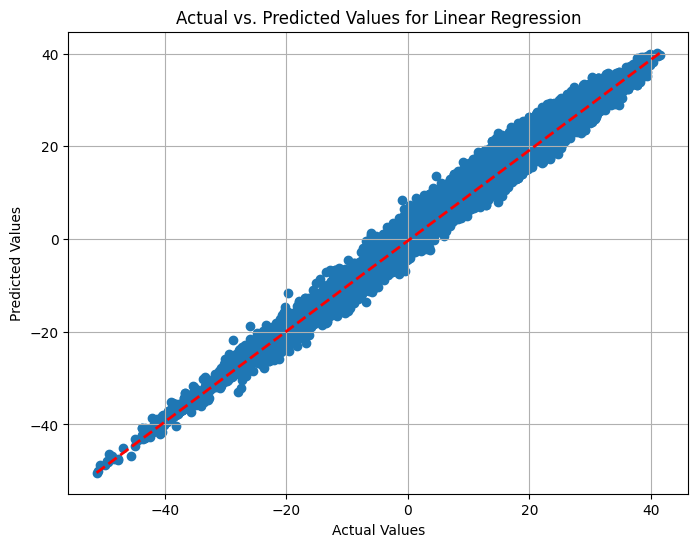

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Linear Regression")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_pred1), max(y_pred1)], linestyle='--', color='red', linewidth=2)

plt.show()

#Lasso Regression

In [61]:
#Lasso Regression
model2 = Lasso(alpha=1.0)
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, y_pred2)
print("MSE for Lasso Regression",mse2)
mae2 = mean_absolute_error(y_test, y_pred2)
print("MAE for Lasso Regression",mae2)

MSE for Lasso Regression 2.3060094838127743
MAE for Lasso Regression 1.1487579515342738


In [40]:
model2.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

For Hypertunning we have used grid search hypertuning of all model's hyperparameter.

In [41]:
from sklearn.model_selection import GridSearchCV

model=Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [100,200,300,500,700,1000],
    'positive': [True,False]
}

grid_search = GridSearchCV(model, param_grid, cv=5,verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params_Lasso = grid_search.best_params_
print(f"Best parameters: {best_params_Lasso}")

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print(f"Test R^2 Score of Best Model: {test_score}")



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 100, 'positive': False}
Test R^2 Score of Best Model: 0.9919490316901486


Lasso model after tuning

In [62]:

model2t=Lasso(alpha= 0.001, fit_intercept= True, max_iter= 100, positive= False)
model2t.fit(X_train_scaled,y_train)
y_predt2=model2t.predict(X_test_scaled)
mse2t = mean_squared_error(y_test, y_predt2)
print('MSE for Lasso Regression after tuning',mse2t)
mae2t = mean_absolute_error(y_test, y_predt2)
print('MAE for Lasso Regression after tuning',mae2t)

MSE for Lasso Regression after tuning 1.2719302197715923
MAE for Lasso Regression after tuning 0.7188872097889148


Regression graph

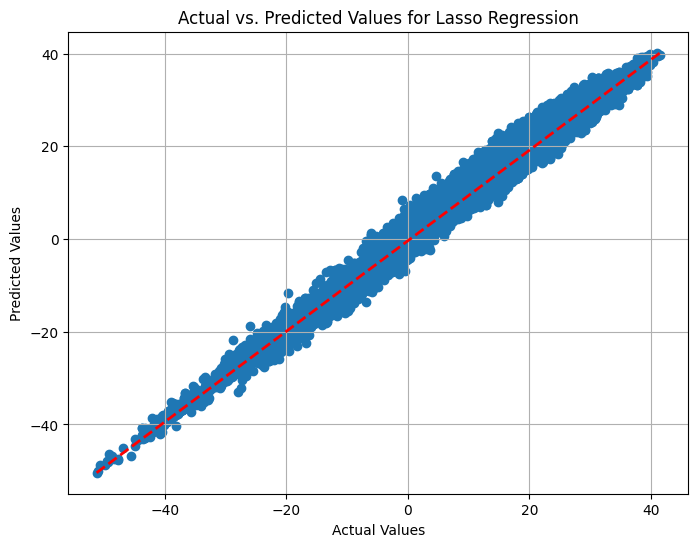

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predt2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Lasso Regression")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_predt2), max(y_predt2)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

#Ridge Regression

In [63]:
#Ridge Regression
model3 = Ridge()
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)
mse3 = mean_squared_error(y_test, y_pred3)
print('MSE for Ridge Regression',mse3)
mae3 = mean_absolute_error(y_test, y_pred3)
print('MAE for Ridge Regression',mae3)

MSE for Ridge Regression 1.271916318517681
MAE for Ridge Regression 0.7188021861444998


In [45]:
model3.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [46]:

model=Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [100,300,500,700,1000],
    'positive': [True,False],
    'tol':[0.0001,0.001,0.01,0.1,1.0]
}

grid_search = GridSearchCV(model, param_grid, cv=5,verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params_Ridge = grid_search.best_params_
print(f"Best parameters: {best_params_Ridge}")

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print(f"Test R^2 Score of Best Model: {test_score}")



Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best parameters: {'alpha': 1, 'fit_intercept': True, 'max_iter': 100, 'positive': False, 'tol': 0.0001}
Test R^2 Score of Best Model: 0.9919491196812608


Ridge regression with hypertuned params

In [69]:

model3t = Ridge(alpha= 1, fit_intercept= True, max_iter= 100, positive= False, tol= 0.0001)
model3t.fit(X_train_scaled, y_train)
y_pred3t = model3.predict(X_test_scaled)
mse3t = mean_squared_error(y_test, y_pred3t)
print('MSE for Ridge regression after tuning',mse3t)
mae3t = mean_absolute_error(y_test, y_pred3t)
print('MAE for Ridge regression after tuning',mae3t)

MSE for Ridge regression after tuning 1.271916318517681
MAE for Ridge regression after tuning 0.7188021861444998


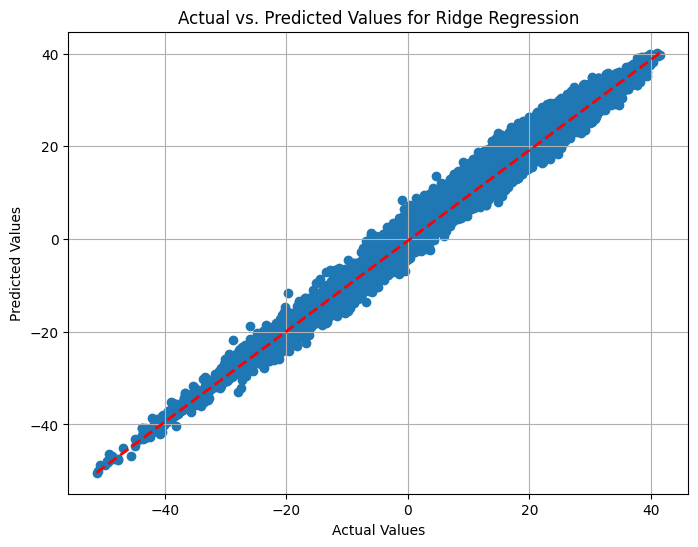

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3t)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Ridge Regression")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_pred3t), max(y_pred3t)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

#Polynomial regression

In [65]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
msep = mean_squared_error(y_test, y_pred)
print('MSE for Polynomial regression ',msep)
maep = mean_absolute_error(y_test, y_pred)
print('MSE for Polynomial regression',maep)

MSE for Polynomial regression  1.2038219030485813
MSE for Polynomial regression 0.6866841651395469


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define hyperparameters to tune
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

model=PolynomialRegression()
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5]
}

# GridSearchCV setup
grid_search = GridSearchCV(model, param_grid, cv=5,verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
best_params_poly = grid_search.best_params_
print(f"Best parameters: {best_params_poly}")

# Evaluate the best model
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print(f"Test R^2 Score of Best Model: {test_score}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'polynomialfeatures__degree': 4}
Test R^2 Score of Best Model: 0.9930078513312386


Polynomial regression with hypertuned params

In [66]:
from sklearn.preprocessing import PolynomialFeatures
degree = 4
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
msept = mean_squared_error(y_test, y_pred)
print('MSE for Polynomial regression after tuning',msept)
maept = mean_absolute_error(y_test, y_pred)
print('MSE for Polynomial regression after tuning',maept)

MSE for Polynomial regression after tuning 1.1046528629420727
MSE for Polynomial regression after tuning 0.6512597023424505


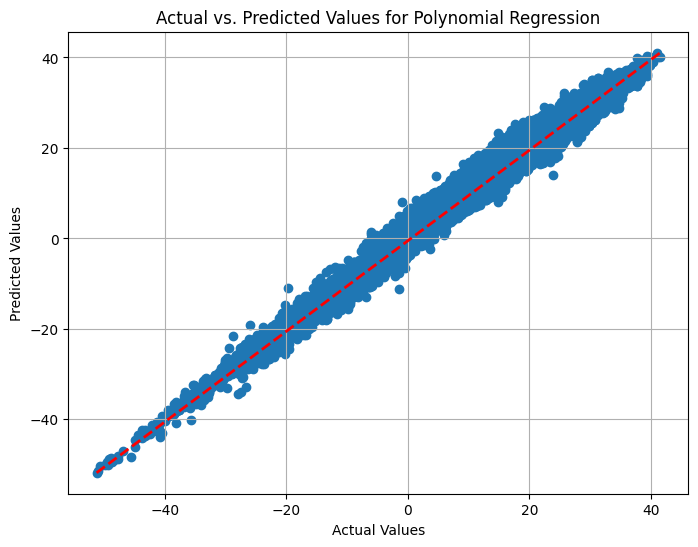

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Polynomial Regression")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

##Results

In [72]:
print('Linear regression:')
print('MSE',mse1)
print('MAE',mae1)

Linear regression:
MSE 1.2719168023921612
MAE 0.7188013550208516


In [73]:
print('Lasso regression:')
print('MSE',mse2)
print('MAE',mae2)

Lasso regression:
MSE 2.3060094838127743
MAE 1.1487579515342738


In [77]:
print('Lasso regression after tunning:')
print('MSE',mse2t)
print('MAE',mae2t)
print('params',best_params_Lasso)

Lasso regression after tunning:
MSE 1.2719302197715923
MAE 0.7188872097889148
params {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 100, 'positive': False}


In [83]:
print('Ridge regression:')
print('MSE',mse3)
print('MAE',mae3)

Ridge regression:
MSE 1.271916318517681
MAE 0.7188021861444998


In [78]:
print('Ridge regression after tunning:')
print('MSE',mse3t)
print('MAE',mae3t)
print('params',best_params_Ridge)

Lasso regression after tunning:
MSE 1.271916318517681
MAE 0.7188021861444998
params {'alpha': 1, 'fit_intercept': True, 'max_iter': 100, 'positive': False, 'tol': 0.0001}


In [79]:
print('Polynomial regression:')
print('MSE',msep)
print('MAE',maep)

Polynomial regression:
MSE 1.2038219030485813
MAE 0.6866841651395469


In [82]:
print('Polynomial regression after tunning:')
print('MSE',msept)
print('MAE',maept)
print('params',best_params_poly)

Lasso regression after tunning:
MSE 1.1046528629420727
MAE 0.6512597023424505
params {'polynomialfeatures__degree': 4}
